In [1]:
import cosmosis
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
class Likelihood:
    """
    This class sets up a pipeline that we can use to calculate the likelihood
    of r
    """
    def __init__(self):
        self.pipe = cosmosis.LikelihoodPipeline("./params.ini")

    def set_pipeline_nz(self, r):
        """
        This tweaks the pipeline to modify the n(z) that is used in it
        """
        # This finds the part of the pipeline that provides the n(z)
        nz_module = [m for m in self.pipe.modules if m.name == 'load_nz'][0]

        # determine the number of z values
        nz = nz_module.data[3][0].size
        nbin = nz_module.data[1]
        rs = np.array_split(r, nbin)
        nz2 = len(rs[0])
        if nz == nz2:
            s = 0
        else:
            s = 1
        for i in range(nbin):
            nz_module.data[3][i, s:] = rs[i]
            
    def __call__(self, r):
        """
        Compute a likelihood for a given choice of n(z)
        """
        self.set_pipeline_nz(r)
        return self.pipe.likelihood([])[0]

    
    
likelihood = Likelihood()


Found 6 samples and 79 bins in redshift in file ./data/first_realization.txt
Calculating Limber: Kernel 1 = sample, Kernel 2 = sample, P_3D = matter_power_nl --> Output: 
Will project these spectra into 2D:
    -  shear_cl
No scale cuts mentioned in ini file.
Found these data sets in the file:
    - shear_cl  420 data points after cuts   [using in likelihood]
Total data points used = 420

Parameter Priors
----------------
cosmological_parameters--omega_m      ~ delta(0.3)
cosmological_parameters--h0           ~ delta(0.69)
cosmological_parameters--omega_b      ~ delta(0.048)
cosmological_parameters--n_s          ~ delta(0.97)
cosmological_parameters--a_s          ~ delta(2.19e-09)
cosmological_parameters--omnuh2       ~ delta(0.0)
cosmological_parameters--w            ~ delta(-1.0)
cosmological_parameters--massive_nu   ~ delta(0)
cosmological_parameters--massless_nu  ~ delta(3.046)
cosmological_parameters--omega_k      ~ delta(0.0)
cosmological_parameters--tau          ~ delta(0.069718

In [3]:
# Load the z values used with this data
z = np.loadtxt("./data/z.txt")

# Load the simulated data.
# It is given as 2400 lines with 474 values per line. Each line
# consists of 79 n(z) values for each of six tomographic bins, for a total of 474 values
# The file is zipped with "gzip" but numpy can read it anyway
realizations = np.loadtxt("./data/realizations.txt.gz")
print(realizations.shape)

(2400, 474)


In [4]:
# This first likelihood should be very close to zero, because
# it was used to generate the simulated data in the first place,
# so it is a perfect fit.
# The later realizations will have lower likelihoods

# Let's print the first two:
print(likelihood(realizations[0]))
print(likelihood(realizations[1]))

# You may see a warning "divide by zero encountered in log10", but it's not a problem

/Users/jzuntz/src/senior_honours/2022/./cosmosis-standard-library/boltzmann/camb/camb_interface.py:400: RuntimeWarning: divide by zero encountered in log10
  mu = 5*np.log10(d_L)+25


-7.491468435370593e-25
-6.899874629221066


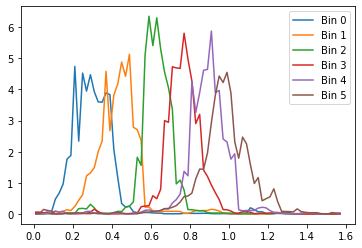

In [5]:
# Make a plot of one of the realizations, split up into bins
realization_per_bin = np.array_split(realizations[0], 6)
for i in range(6):
    plt.plot(z, realization_per_bin[i], label=f'Bin {i}')
plt.legend()